In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

import math

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from scipy import stats
from scipy.stats import norm
%matplotlib inline

import missingno as msno

In [2]:
# Load the data
df_train = pd.read_csv('../data/train.csv')

In [13]:
# Replace -1 with NaN, as they are missing values
df_nan = df_train.replace(-1, np.NaN)
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

In [39]:
nbr_missing = df_nan.isnull().sum().sort_values(ascending=False)
# Percent missing values
print(nbr_missing[nbr_missing > 0] / df_nan.shape[0] * 100)

ps_car_03_cat    69.089837
ps_car_05_cat    44.782531
ps_reg_03        18.106490
ps_car_14         7.160474
ps_car_07_cat     1.930237
ps_ind_05_cat     0.975955
ps_car_09_cat     0.095596
ps_ind_02_cat     0.036290
ps_car_01_cat     0.017977
ps_ind_04_cat     0.013945
ps_car_02_cat     0.000840
ps_car_11         0.000840
ps_car_12         0.000168
dtype: float64


In [31]:
# Chosen to drop all columns that have more than 10 % missing
drop_cols = ['ps_car_03_cat', 'ps_car_05_cat', 'ps_reg_03']

# Taking easy way out by dropping all the rows with missing values. 
# Probably not very good as we lose about 50000 (10% data) entries
df_dropped = df_nan.drop(drop_cols, axis=1).dropna()
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541860 entries, 0 to 595211
Data columns (total 56 columns):
id                541860 non-null int64
target            541860 non-null int64
ps_ind_01         541860 non-null int64
ps_ind_02_cat     541860 non-null float64
ps_ind_03         541860 non-null int64
ps_ind_04_cat     541860 non-null float64
ps_ind_05_cat     541860 non-null float64
ps_ind_06_bin     541860 non-null int64
ps_ind_07_bin     541860 non-null int64
ps_ind_08_bin     541860 non-null int64
ps_ind_09_bin     541860 non-null int64
ps_ind_10_bin     541860 non-null int64
ps_ind_11_bin     541860 non-null int64
ps_ind_12_bin     541860 non-null int64
ps_ind_13_bin     541860 non-null int64
ps_ind_14         541860 non-null int64
ps_ind_15         541860 non-null int64
ps_ind_16_bin     541860 non-null int64
ps_ind_17_bin     541860 non-null int64
ps_ind_18_bin     541860 non-null int64
ps_reg_01         541860 non-null float64
ps_reg_02         541860 non-null float64

ps_car_06_cat      153
target           19150
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 541860 entries, 0 to 595211
Data columns (total 56 columns):
id                541860 non-null int64
target            541860 non-null int64
ps_ind_01         541860 non-null int64
ps_ind_02_cat     541860 non-null float64
ps_ind_03         541860 non-null int64
ps_ind_04_cat     541860 non-null float64
ps_ind_05_cat     541860 non-null float64
ps_ind_06_bin     541860 non-null int64
ps_ind_07_bin     541860 non-null int64
ps_ind_08_bin     541860 non-null int64
ps_ind_09_bin     541860 non-null int64
ps_ind_10_bin     541860 non-null int64
ps_ind_11_bin     541860 non-null int64
ps_ind_12_bin     541860 non-null int64
ps_ind_13_bin     541860 non-null int64
ps_ind_14         541860 non-null int64
ps_ind_15         541860 non-null int64
ps_ind_16_bin     541860 non-null int64
ps_ind_17_bin     541860 non-null int64
ps_ind_18_bin     541860 non-null int64
ps_reg_01         541860

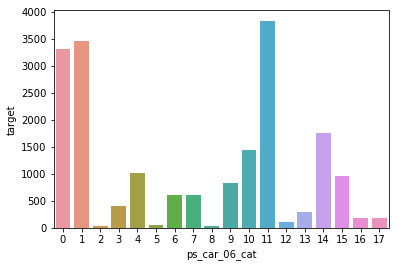

In [90]:
nbr_target_1 = df_dropped[df_dropped['target']== 1]['target'].value_counts()
nbr_target_0 = df_dropped[df_dropped['target']== 0]['target'].value_counts()
nbr_target_ratio = nbr_target_1 / float(nbr_target_0)

bob = df_dropped[['target', 'ps_car_06_cat']].groupby(['ps_car_06_cat'],as_index=False).sum()
print(bob.sum())

sns.barplot(x='ps_car_06_cat', y='target', data = bob)